# Absolute stability

Like FD formulas, an IVP formula has a local truncation error and order of accuracy. These measure how well the formula approximates the ODE, but it's not immediate that the formula's solution converges to the true one. We also need **zero stability**, which means that the solution remains bounded as the step size approaches zero. The celebrated **Dahlquist Equivalence Theorem** states that accuracy and stability together imply convergence (at the same order of accuracy as the LTE).

However, there is another sense of stability which is just as important in practice, based on the model problem

:::{math}
:label: absstabmodel
y' = \lambda y, \quad y(0)=1.
:::

::::{prf:definition} Absolute stability
Let $\lambda$ be a complex number, and let $y_0,y_1,y_2,\ldots,y_n$ be the numerical solution at times $0,\tau,2\tau,\ldots,n\tau$ of {eq}`absstabmodel` using a Runge–Kutta or multistep method with fixed step size $\tau$. Then the method is said to be **absolutely stable** at $\zeta = \tau\lambda$ if $|y_n|$ is bounded above as $n\to\infty$. 
::::

::::{prf:observation}
Solutions of {eq}`absstabmodel` are bounded as $t\to\infty$ if and only if $\alpha = \operatorname{Re} \lambda \le 0$. 
::::

The fact that absolute stability depends only on the product $\zeta = \tau\lambda$, and not independently on the individual factors, is a result of how the IVP solvers are defined, as we will see below. Since $\lambda$ has units of inverse time, $\zeta$ is dimensionless.

Note that both senses of stability have to do with taking infinitely many steps: $\tau\to 0$ for $t$ in a finite interval $[a,b]$ for zero stability, and $t\to \infty$ with $\tau$ fixed. We never actually take infinitely many steps, of course, but since the instabilities are generally exponential, they are manifested in practice well before reaching the limit.

## Linearization and diagonalization

Before proceeding, we address why the model equation $y'=\lambda y$ of absolute stability has wide relevance. Through diagonalization, it is easily generalized to $\mathbf{u}'=\mathbf{A} \mathbf{u}$ for a constant matrix $\mathbf{A}$. But that is still a severely limited type of problem.

Consider a general vector nonlinear system 

:::{math}
:label: stiffsystem
\mathbf{u}'=\mathbf{f}(t,\mathbf{u}).
:::

The key to making a connection with absolute stability is to look not at an exact solution but to *perturbations* of one. Such perturbations always exist in real numerical solutions, such as those due to roundoff error, for example. But if we assume the perturbations are tiny, then we can use linear approximations to describe their evolution. If we conclude from such an approximation that the perturbation may grow without bound, then we must seriously question the value of the numerical solution.

Suppose that $\hat{\mathbf{u}}(t)$ is an exact solution that we wish to track, and that a perturbation has pushed us to a nearby solution $\hat{\mathbf{u}}(t) + \mathbf{v}(t)$. Substituting this solution into the governing ODE and appealing to a multidimensional Taylor series, we derive

:::{math}
[\hat{\mathbf{u}}(t) + \mathbf{v}(t)]' &= \mathbf{f}\bigl(t,\hat{\mathbf{u}}(t) + \mathbf{v}(t)\bigr), \\
\hat{\mathbf{u}}'(t) + \mathbf{v}'(t) &= \mathbf{f}\left(t, \hat{\mathbf{u}}(t)\right) + \mathbf{J}(t) \mathbf{v}(t) + O\bigl( \|\mathbf{v}(t)\|^2 \bigr),
:::

in terms of the Jacobian matrix $\mathbf{J}$. By dropping the higher-order terms, which are negligible at least initially, we derive a linear ODE for the evolution of the perturbation. 

The Jacobian matrix is time-dependent, which makes analysis even of a linear ODE system difficult. If a perturbation is introduced at a moment $t=t_\star$, we freeze the Jacobian there and consider

:::{math}
\mathbf{v}'=\mathbf{A}\mathbf{v}, \quad \mathbf{A}=\mathbf{J}(t_\star).
:::

Boundedness of solutions to this problem depends on boundedness for $y'=\lambda y$, for $\lambda$ taking on the eigenvalues of $\bfA$. 

## Stability regions

Each numerical IVP solver has its own collection of $\zeta$ values for which it is absolutely stable.

::::{prf:definition} Stability region
The **stability region** of an IVP solver is the collection of all $\zeta\in\complex$ for which the method is absolutely stable.
::::

(example-absstab-euler)=
::::{prf:example}
Consider an Euler discretization of $y'=\lambda y$:
  
$$
  y_{k+1} = y_k + \tau( \lambda y_k) =   (1+ \zeta ) y_k.
$$

Given that $y_0=1$ by {eq}`absstabmodel`, we easily deduce that $y_k = (1+\zeta)^k$ for all $k$, and therefore

$$
|y_k| = |1+\zeta|^k.
$$

Hence $|y_k|$ remains bounded above as $k\to \infty$ if and only if $|1+\zeta| \le 1$. Because $\zeta$ is a complex number, it's easiest to interpret this condition geometrically:

$$
  |\zeta + 1 | = |\zeta - (-1) | \le 1.
$$

That is, the distance in the plane from $\zeta$ to the point $-1$ is less than or equal to 1. This description defines a closed disk of radius 1 centered at $(-1,0)$.
::::

(example-absstab-AM1)=
::::{prf:example}
The backward Euler method discretizes {eq}`absstabmodel` as

$$
y_{k+1} = y_k + \tau( \lambda y_{k+1}) \quad \Rightarrow \quad y_{k+1} =  \frac{1}{1-\zeta} y_k.
$$

Therefore, $y_k=(1-\zeta)^{-k}$ for all $k$, and absolute stability requires $|1-\zeta|^{-1} \le 1$, or 

$$
|\zeta-1|\ge 1.
$$

This inequality describes the region *outside* of the open disk of radius 1 centered at $1$ on the real axis of the complex plane.
::::

Stability regions for common IVP integrators are given in {numref}`figure-stabreg_ab_am` and {numref}`figure-stabreg_bd_rk`.  Note that those for the implicit Adams-Moulton methods are larger than those for the explicit Adams-Bashforth methods of the same order.  For the implicit backward differentiation methods, the exteriors of the curves provide large regions of stability, but significant portions of the imaginary axis may be excluded.  Finally, while the single-step Runge-Kutta methods have smaller regions of stability, those of orders 3 and 4 do include significant portions of the imaginary axis.

```{figure} stabreg_ab_am.svg
:name: figure-stabreg_ab_am
Stability regions for Adams–Bashforth methods of order 1–4 (left) and Adams–Moulton methods of order 2–5 (right). The plots are in the complex $\zeta$-plane.
```

```{figure} stabreg_bd_rk.svg
:name: figure-stabreg_bd_rk
Stability regions for backward differentiation methods of order 1–4 (left, exteriors of curves) and Runge–Kutta methods of order 1–4 (right). The plots are in the complex $\zeta$-plane.
```

## Step size restrictions

For any particular method and value of $\lambda$ in {eq}`absstabmodel`, we can use the stability region to deduce which, if any, values of the time step $\tau$ will give bounded solutions. Both the magnitude and the argument (angle) of $\lambda$ play a role in determining such constraints.

(example-absstab-FEBE)=
::::{prf:example}
Suppose $\lambda=-4$ and Euler's method is applied. Since the time step is always positive, $\zeta=-4\tau$ is always on the negative real axis. The only part of that line that lies within the stability region of Euler as derived in {numref}`Example {number} <example-absstab-euler>` is the real interval $[-2,0]$. Hence we require $\zeta\ge -2$, or $\tau \le 1/2$. By contrast, the stability region of backward Euler includes the entire negative real axis, so absolute stability is unconditional, i.e., assured regardless of $\tau$.

Now suppose instead that $\lambda=i$, so that $\zeta=i\tau$. Clearly $\zeta$ is always on the positive imaginary axis. But no part of this axis, aside from the origin, lies in the stability region of Euler's method, so it is unconditionally *unstable* in this circumstance. The conclusion for backward Euler is the opposite; any value of $\tau$ will do, because the entire imaginary axis is within the stability region.
::::

The fact that implicit methods have larger stability regions than their explicit counterparts is the primary justification for using them. While they have larger work requirements per step, they sometimes can take steps that are orders of magnitude larger than explicit methods and still remain stable.


## Step size selection

Modern solvers have a means of not just producing a numerical solution but also estimating the error in it. Since we are usually more interested in controlling the error than selecting a particular step size, the solver predicts a tentative solution, rejecting or accepting it based on whether it seems to be as accurate as the user would like, and then adjusting the step size to run as closely as possible to the error tolerance without incurring a needlessly long computation time. Ideally, the step size shrinks and grows along with the time scale of changes in the solution.

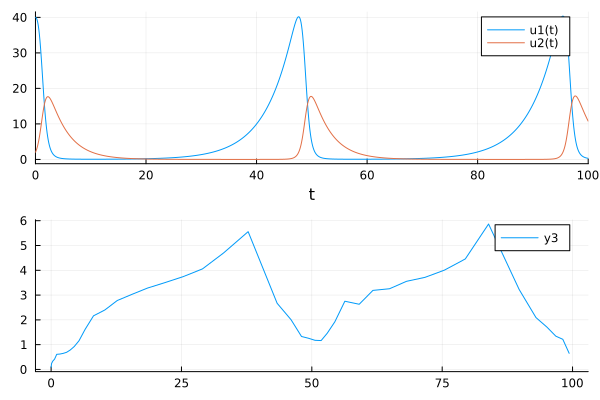

In [1]:
using OrdinaryDiffEq, Plots
function predprey(u,params,t)
    rabbits,foxes = u 
    ⍺,β,γ,δ = params
    ∂ₜrabbits = ⍺*rabbits - β*rabbits*foxes
    ∂ₜfoxes = γ*rabbits*foxes - δ*foxes
    return [∂ₜrabbits,∂ₜfoxes]
end

u₀ = [40,2]
tspan = (0.0,100.0)
ivp = ODEProblem(predprey,u₀,tspan,(0.2,0.1,0.05,0.3))
sol = solve(ivp,BS5())

t = sol.t
Δt = [t[k+1]-t[k] for k in 1:length(t)-1]
plot(layout=(2,1),link=:x)
plot!(sol,subplot=1)
plot!(t[1:end-1],Δt,subplot=2)

In practice, step size is reduced for two primary reasons. The first is that the actual solution changes on a time scale that is comparable to or much less than $\tau$, as seen above. The other is to maintain absolute stability, and this effect is pervasive in problems that involve diffusion, as we will see.